# Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [9]:
quandl.ApiConfig.api_key = '38k7V-M2oFHeuTNo2pw2'
ugd = quandl.get_table('IFT/NSA',ticker='UGD')

In [10]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

tickers = save_sp500_tickers()

In [7]:
quandl.ApiConfig.api_key = '38k7V-M2oFHeuTNo2pw2'
ticker_data  = quandl.get_table('IFT/NSA',ticker=['AAPL'],paginate=True)

In [11]:
result = {}
for each_ticker in tickers:
    result[each_ticker]=quandl.get_table('IFT/NSA',ticker=each_ticker,paginate=True)
    

In [35]:
result_df = result["MMM"]
for each_ticker in tickers[1:]:
    result_df = result_df.append(result[each_ticker])

In [37]:
result_df.shape

(2456530, 9)

In [41]:
result_df.to_csv("result_df.csv")

In [43]:
result_df.columns

Index(['ticker', 'exchange_cd', 'date', 'sentiment', 'sentiment_high',
       'sentiment_low', 'news_volume', 'news_buzz', 'name'],
      dtype='object')

In [44]:
result_df.head()

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name
None,,,,,,,,,
0,MMM,US,2018-07-20,1.0,1.0,1.0,1,10.0,3M CO
1,MMM,CN,2018-07-20,0.0,0.0,0.0,0,0.0,MINCO GOLD CORP
2,MMM,US,2018-07-21,0.0,0.0,0.0,0,0.0,3M CO
3,MMM,CN,2018-07-21,0.0,0.0,0.0,0,0.0,MINCO GOLD CORP
4,MMM,US,2018-07-22,0.0,0.0,0.0,0,0.0,3M CO


In [56]:
result_df2 = result_df[result_df["exchange_cd"] == "US"]

In [57]:
result_df2.to_csv("result_df2.csv")

In [59]:
result_df2["date"].min()

Timestamp('2013-01-01 00:00:00')

In [61]:
#stock prices
quandl.ApiConfig.api_key = '38k7V-M2oFHeuTNo2pw2'
a = tickers[0]
x= quandl.get_table('SHARADAR/SF1', ticker=a)

In [62]:
x

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,MMM,MRY,2017-12-31,2017-12-31,2017-12-31,2018-07-26,-7.026000e+09,3.798700e+10,3.511825e+10,1.427700e+10,...,595608108.0,597500000,612700000.0,52.982,2.453800e+10,0.0,2.679000e+09,3.100000e+08,41.150,6.590000e+09
1,MMM,MRY,2016-12-31,2016-12-31,2016-12-31,2018-07-26,-7.245000e+09,3.290600e+10,3.329350e+10,1.172600e+10,...,601466401.0,604700000,618700000.0,49.792,2.142000e+10,0.0,1.995000e+09,2.990000e+08,35.688,5.507000e+09
2,MMM,MRY,2015-12-31,2015-12-31,2015-12-31,2018-07-26,-6.359000e+09,3.288300e+10,3.204300e+10,1.098600e+10,...,615712937.0,625600000,637200000.0,48.392,2.103300e+10,0.0,1.982000e+09,3.320000e+08,34.245,3.868000e+09
3,MMM,MRY,2014-12-31,2014-12-31,2014-12-31,2018-07-26,-6.289000e+09,3.120900e+10,3.287550e+10,1.230300e+10,...,640818842.0,649200000,662000000.0,49.016,2.272400e+10,0.0,2.028000e+09,4.350000e+08,35.612,6.339000e+09
4,MMM,MRY,2013-12-31,2013-12-31,2013-12-31,2018-07-26,-3.913000e+09,3.355000e+10,3.382825e+10,1.273300e+10,...,673269679.0,681900000,693600000.0,45.272,2.451700e+10,0.0,1.841000e+09,4.170000e+08,36.680,5.235000e+09
5,MMM,MRY,2012-12-31,2012-12-31,2012-12-31,2018-07-26,-4.750000e+09,3.387600e+10,3.342725e+10,1.363000e+10,...,691931278.0,693900000,703300000.0,43.096,2.456600e+10,0.0,1.840000e+09,3.710000e+08,35.526,7.430000e+09
6,MMM,MRY,2011-12-31,2011-12-31,2011-12-31,2018-07-26,-5.025000e+09,3.161600e+10,3.178550e+10,1.224000e+10,...,700844681.0,708500000,719000000.0,41.794,2.265300e+10,0.0,1.674000e+09,3.550000e+08,32.301,6.799000e+09
7,MMM,MRY,2010-12-31,2010-12-31,2010-12-31,2018-07-26,-3.543000e+09,3.015600e+10,2.918475e+10,1.221500e+10,...,714859083.0,713700000,725500000.0,37.357,2.151600e+10,0.0,1.592000e+09,3.580000e+08,30.109,6.126000e+09
8,MMM,MRY,2009-12-31,2009-12-31,2009-12-31,2018-07-26,-3.754000e+09,2.725000e+10,2.632900e+10,1.079500e+10,...,707958268.0,700500000,706700000.0,33.009,2.007600e+10,0.0,1.388000e+09,2.520000e+08,28.320,5.898000e+09


In [64]:
quandl.ApiConfig.api_key = '38k7V-M2oFHeuTNo2pw2'
stock_prices = {}
for each_ticker in tickers:
    stock_prices[each_ticker]=quandl.get_table('SHARADAR/SF1', ticker=each_ticker,paginate=True)

In [65]:
stock_prices["MMM"]

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,MMM,MRY,2017-12-31,2017-12-31,2017-12-31,2018-07-26,-7.026000e+09,3.798700e+10,3.511825e+10,1.427700e+10,...,595608108.0,597500000,612700000.0,52.982,2.453800e+10,0.0,2.679000e+09,3.100000e+08,41.150,6.590000e+09
1,MMM,MRY,2016-12-31,2016-12-31,2016-12-31,2018-07-26,-7.245000e+09,3.290600e+10,3.329350e+10,1.172600e+10,...,601466401.0,604700000,618700000.0,49.792,2.142000e+10,0.0,1.995000e+09,2.990000e+08,35.688,5.507000e+09
2,MMM,MRY,2015-12-31,2015-12-31,2015-12-31,2018-07-26,-6.359000e+09,3.288300e+10,3.204300e+10,1.098600e+10,...,615712937.0,625600000,637200000.0,48.392,2.103300e+10,0.0,1.982000e+09,3.320000e+08,34.245,3.868000e+09
3,MMM,MRY,2014-12-31,2014-12-31,2014-12-31,2018-07-26,-6.289000e+09,3.120900e+10,3.287550e+10,1.230300e+10,...,640818842.0,649200000,662000000.0,49.016,2.272400e+10,0.0,2.028000e+09,4.350000e+08,35.612,6.339000e+09
4,MMM,MRY,2013-12-31,2013-12-31,2013-12-31,2018-07-26,-3.913000e+09,3.355000e+10,3.382825e+10,1.273300e+10,...,673269679.0,681900000,693600000.0,45.272,2.451700e+10,0.0,1.841000e+09,4.170000e+08,36.680,5.235000e+09
5,MMM,MRY,2012-12-31,2012-12-31,2012-12-31,2018-07-26,-4.750000e+09,3.387600e+10,3.342725e+10,1.363000e+10,...,691931278.0,693900000,703300000.0,43.096,2.456600e+10,0.0,1.840000e+09,3.710000e+08,35.526,7.430000e+09
6,MMM,MRY,2011-12-31,2011-12-31,2011-12-31,2018-07-26,-5.025000e+09,3.161600e+10,3.178550e+10,1.224000e+10,...,700844681.0,708500000,719000000.0,41.794,2.265300e+10,0.0,1.674000e+09,3.550000e+08,32.301,6.799000e+09
7,MMM,MRY,2010-12-31,2010-12-31,2010-12-31,2018-07-26,-3.543000e+09,3.015600e+10,2.918475e+10,1.221500e+10,...,714859083.0,713700000,725500000.0,37.357,2.151600e+10,0.0,1.592000e+09,3.580000e+08,30.109,6.126000e+09
8,MMM,MRY,2009-12-31,2009-12-31,2009-12-31,2018-07-26,-3.754000e+09,2.725000e+10,2.632900e+10,1.079500e+10,...,707958268.0,700500000,706700000.0,33.009,2.007600e+10,0.0,1.388000e+09,2.520000e+08,28.320,5.898000e+09


In [69]:
x = stock_prices["MMM"]

In [70]:
x = stock_prices["MMM"]
for each_ticker in tickers[1:]:
    x = x.append(stock_prices[each_ticker])

In [73]:
x.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,MMM,MRY,2017-12-31,2017-12-31,2017-12-31,2018-07-26,-7.026000e+09,3.798700e+10,3.51182e+10,1.4277e+10,...,595608108.0,597500000.0,6.127e+08,52.982,2.453800e+10,0.0,2.679000e+09,310000000.0,41.150,6.59e+09
1,MMM,MRY,2016-12-31,2016-12-31,2016-12-31,2018-07-26,-7.245000e+09,3.290600e+10,3.32935e+10,1.1726e+10,...,601466401.0,604700000.0,6.187e+08,49.792,2.142000e+10,0.0,1.995000e+09,299000000.0,35.688,5.507e+09
2,MMM,MRY,2015-12-31,2015-12-31,2015-12-31,2018-07-26,-6.359000e+09,3.288300e+10,3.2043e+10,1.0986e+10,...,615712937.0,625600000.0,6.372e+08,48.392,2.103300e+10,0.0,1.982000e+09,332000000.0,34.245,3.868e+09
3,MMM,MRY,2014-12-31,2014-12-31,2014-12-31,2018-07-26,-6.289000e+09,3.120900e+10,3.28755e+10,1.2303e+10,...,640818842.0,649200000.0,6.62e+08,49.016,2.272400e+10,0.0,2.028000e+09,435000000.0,35.612,6.339e+09
4,MMM,MRY,2013-12-31,2013-12-31,2013-12-31,2018-07-26,-3.913000e+09,3.355000e+10,3.38282e+10,1.2733e+10,...,673269679.0,681900000.0,6.936e+08,45.272,2.451700e+10,0.0,1.841000e+09,417000000.0,36.680,5.235e+09


In [74]:
x.to_csv("stock_prices.csv")

In [75]:
x.columns

Index(['ticker', 'dimension', 'calendardate', 'datekey', 'reportperiod',
       'lastupdated', 'accoci', 'assets', 'assetsavg', 'assetsc',
       ...
       'sharesbas', 'shareswa', 'shareswadil', 'sps', 'tangibles', 'taxassets',
       'taxexp', 'taxliabilities', 'tbvps', 'workingcapital'],
      dtype='object', length=111)

In [76]:
[print(x) for x in x.columns]

ticker
dimension
calendardate
datekey
reportperiod
lastupdated
accoci
assets
assetsavg
assetsc
assetsnc
assetturnover
bvps
capex
cashneq
cashnequsd
cor
consolinc
currentratio
de
debt
debtc
debtnc
debtusd
deferredrev
depamor
deposits
divyield
dps
ebit
ebitda
ebitdamargin
ebitdausd
ebitusd
ebt
eps
epsdil
epsusd
equity
equityavg
equityusd
ev
evebit
evebitda
fcf
fcfps
fxusd
gp
grossmargin
intangibles
intexp
invcap
invcapavg
inventory
investments
investmentsc
investmentsnc
liabilities
liabilitiesc
liabilitiesnc
marketcap
ncf
ncfbus
ncfcommon
ncfdebt
ncfdiv
ncff
ncfi
ncfinv
ncfo
ncfx
netinc
netinccmn
netinccmnusd
netincdis
netincnci
netmargin
opex
opinc
payables
payoutratio
pb
pe
pe1
ppnenet
prefdivis
price
ps
ps1
receivables
retearn
revenue
revenueusd
rnd
roa
roe
roic
ros
sbcomp
sgna
sharefactor
sharesbas
shareswa
shareswadil
sps
tangibles
taxassets
taxexp
taxliabilities
tbvps
workingcapital


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [78]:
quandl.ApiConfig.api_key = '38k7V-M2oFHeuTNo2pw2'
ticker_info = quandl.get_table('SHARADAR/TICKERS',paginate=True)

In [80]:
x.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,MMM,MRY,2017-12-31,2017-12-31,2017-12-31,2018-07-26,-7.026000e+09,3.798700e+10,3.51182e+10,1.4277e+10,...,595608108.0,597500000.0,6.127e+08,52.982,2.453800e+10,0.0,2.679000e+09,310000000.0,41.150,6.59e+09
1,MMM,MRY,2016-12-31,2016-12-31,2016-12-31,2018-07-26,-7.245000e+09,3.290600e+10,3.32935e+10,1.1726e+10,...,601466401.0,604700000.0,6.187e+08,49.792,2.142000e+10,0.0,1.995000e+09,299000000.0,35.688,5.507e+09
2,MMM,MRY,2015-12-31,2015-12-31,2015-12-31,2018-07-26,-6.359000e+09,3.288300e+10,3.2043e+10,1.0986e+10,...,615712937.0,625600000.0,6.372e+08,48.392,2.103300e+10,0.0,1.982000e+09,332000000.0,34.245,3.868e+09
3,MMM,MRY,2014-12-31,2014-12-31,2014-12-31,2018-07-26,-6.289000e+09,3.120900e+10,3.28755e+10,1.2303e+10,...,640818842.0,649200000.0,6.62e+08,49.016,2.272400e+10,0.0,2.028000e+09,435000000.0,35.612,6.339e+09
4,MMM,MRY,2013-12-31,2013-12-31,2013-12-31,2018-07-26,-3.913000e+09,3.355000e+10,3.38282e+10,1.2733e+10,...,673269679.0,681900000.0,6.936e+08,45.272,2.451700e+10,0.0,1.841000e+09,417000000.0,36.680,5.235e+09


In [84]:
y = pd.merge(ticker_info[["ticker","sicsector","sicindustry","sector","industry"]],x,on="ticker")

In [86]:
x.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,MMM,MRY,2017-12-31,2017-12-31,2017-12-31,2018-07-26,-7.026000e+09,3.798700e+10,3.51182e+10,1.4277e+10,...,595608108.0,597500000.0,6.127e+08,52.982,2.453800e+10,0.0,2.679000e+09,310000000.0,41.150,6.59e+09
1,MMM,MRY,2016-12-31,2016-12-31,2016-12-31,2018-07-26,-7.245000e+09,3.290600e+10,3.32935e+10,1.1726e+10,...,601466401.0,604700000.0,6.187e+08,49.792,2.142000e+10,0.0,1.995000e+09,299000000.0,35.688,5.507e+09
2,MMM,MRY,2015-12-31,2015-12-31,2015-12-31,2018-07-26,-6.359000e+09,3.288300e+10,3.2043e+10,1.0986e+10,...,615712937.0,625600000.0,6.372e+08,48.392,2.103300e+10,0.0,1.982000e+09,332000000.0,34.245,3.868e+09
3,MMM,MRY,2014-12-31,2014-12-31,2014-12-31,2018-07-26,-6.289000e+09,3.120900e+10,3.28755e+10,1.2303e+10,...,640818842.0,649200000.0,6.62e+08,49.016,2.272400e+10,0.0,2.028000e+09,435000000.0,35.612,6.339e+09
4,MMM,MRY,2013-12-31,2013-12-31,2013-12-31,2018-07-26,-3.913000e+09,3.355000e+10,3.38282e+10,1.2733e+10,...,673269679.0,681900000.0,6.936e+08,45.272,2.451700e+10,0.0,1.841000e+09,417000000.0,36.680,5.235e+09


In [179]:
y.head()

,ticker,sicsector,sicindustry,sector,industry,dimension,calendardate,datekey,reportperiod,lastupdated,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,MRY,2017-12-31,2017-10-31,2017-10-31,2018-08-30,...,321828003.0,322000000.0,3.26e+08,13.888,5.458000e+09,0.0,119000000.0,0.0,16.950,2.906e+09
1,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,MRY,2016-12-31,2016-10-31,2016-10-31,2018-08-30,...,324384755.0,326000000.0,3.29e+08,12.890,4.861000e+09,0.0,82000000.0,0.0,14.911,2.69e+09
2,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,MRY,2015-12-31,2015-10-31,2015-10-31,2018-08-30,...,331403231.0,333000000.0,3.35e+08,12.126,4.668000e+09,0.0,42000000.0,0.0,14.145,2.71e+09
3,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,MRY,2014-12-31,2014-10-31,2014-10-31,2018-08-30,...,333512738.0,333000000.0,3.38e+08,12.156,7.659000e+09,0.0,-3000000.0,0.0,23.000,3.817e+09
4,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,MRY,2013-12-31,2013-10-31,2013-10-31,2018-08-30,...,330791981.0,341000000.0,3.45e+08,11.419,6.723000e+09,0.0,68000000.0,0.0,20.250,3.381e+09


In [96]:
y.to_csv("stock_price_sector.csv")

In [99]:
y["calendardate"]=pd.to_datetime(y["calendardate"])

In [123]:
y_date_filter = y[(y["calendardate"].dt.year==2017) & (y["calendardate"].dt.month==12) & (y["dimension"]=="ART")]

In [126]:
y_date_filter.head()

,ticker,sicsector,sicindustry,sector,industry,dimension,calendardate,datekey,reportperiod,lastupdated,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
208,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,ART,2017-12-31,2018-03-06,2018-01-31,2018-08-30,...,322476579.0,323000000.0,3.23e+08,14.291,5.724000e+09,0.0,6.470000e+08,0.0,17.721,3.036e+09
571,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,ART,2017-12-31,2018-03-06,2018-01-31,2018-08-30,...,322476579.0,323000000.0,3.23e+08,14.291,5.724000e+09,0.0,6.470000e+08,0.0,17.721,3.036e+09
938,AAL,Transportation Communications Electric Gas And...,Air Transportation Scheduled,Industrials,Airlines,ART,2017-12-31,2018-02-21,2017-12-31,2018-07-26,...,473138683.0,473138683.0,None,89.206,4.510200e+10,427000000.0,1.165000e+09,0.0,95.325,-5.818e+09
1308,AAL,Transportation Communications Electric Gas And...,Air Transportation Scheduled,Industrials,Airlines,ART,2017-12-31,2018-02-21,2017-12-31,2018-07-26,...,473138683.0,473138683.0,None,89.206,4.510200e+10,427000000.0,1.165000e+09,0.0,95.325,-5.818e+09
1650,AAP,Retail Trade,Retail-Auto & Home Supply Stores,Consumer Cyclical,Specialty Retail,ART,2017-12-31,2018-02-21,2017-12-30,2018-08-14,...,73978120.0,73846000.0,7.411e+07,126.937,6.890334e+09,0.0,4.475400e+07,303620000.0,93.235,1.9468e+09


In [125]:
len(y_date_filter["ticker"].unique())

497

In [133]:
y_no_duplicates = y_date_filter.drop_duplicates(subset = "ticker",keep="first")

In [135]:
len(y_no_duplicates["ticker"].unique())

497

In [136]:
[print(x) for x in y_no_duplicates.columns]

ticker
sicsector
sicindustry
sector
industry
dimension
calendardate
datekey
reportperiod
lastupdated
accoci
assets
assetsavg
assetsc
assetsnc
assetturnover
bvps
capex
cashneq
cashnequsd
cor
consolinc
currentratio
de
debt
debtc
debtnc
debtusd
deferredrev
depamor
deposits
divyield
dps
ebit
ebitda
ebitdamargin
ebitdausd
ebitusd
ebt
eps
epsdil
epsusd
equity
equityavg
equityusd
ev
evebit
evebitda
fcf
fcfps
fxusd
gp
grossmargin
intangibles
intexp
invcap
invcapavg
inventory
investments
investmentsc
investmentsnc
liabilities
liabilitiesc
liabilitiesnc
marketcap
ncf
ncfbus
ncfcommon
ncfdebt
ncfdiv
ncff
ncfi
ncfinv
ncfo
ncfx
netinc
netinccmn
netinccmnusd
netincdis
netincnci
netmargin
opex
opinc
payables
payoutratio
pb
pe
pe1
ppnenet
prefdivis
price
ps
ps1
receivables
retearn
revenue
revenueusd
rnd
roa
roe
roic
ros
sbcomp
sgna
sharefactor
sharesbas
shareswa
shareswadil
sps
tangibles
taxassets
taxexp
taxliabilities
tbvps
workingcapital


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

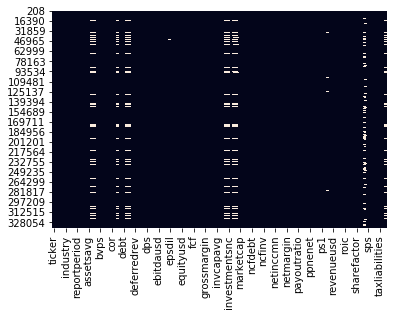

In [137]:
sns.heatmap(y_no_duplicates.isnull(), cbar=False)

In [140]:
columns = y_no_duplicates.columns
percent_missing = y_no_duplicates.isnull().sum() * 100 / len(y_no_duplicates)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [147]:
missing_value_df.reset_index(inplace=True)

In [149]:
missing_value_df.drop("index",axis=1,inplace=True)

In [165]:
missing_value_df.tail()

,column_name,percent_missing
110,assetsnc,17.505030
111,currentratio,17.505030
112,debtnc,17.505030
113,workingcapital,17.505030
114,shareswadil,28.973843


In [162]:
missing_value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
column_name        115 non-null object
percent_missing    115 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [166]:
missing_value_df["missing"]= missing_value_df["percent_missing"]>10

In [172]:
missing_value_df.tail()

,column_name,percent_missing,missing
110,assetsnc,17.505030,True
111,currentratio,17.505030,True
112,debtnc,17.505030,True
113,workingcapital,17.505030,True
114,shareswadil,28.973843,True


In [176]:
keep_column = missing_value_df[missing_value_df["percent_missing"]<10]["column_name"]

In [178]:
t_tsne = y_no_duplicates[keep_column]

In [180]:
quandl.ApiConfig.api_key = '38k7V-M2oFHeuTNo2pw2'
daily_prices = quandl.get_table('SHARADAR/DAILY', paginate=True)

In [186]:
daily_prices[daily_prices["ticker"]=="AAPL"].head()

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps
None,,,,,,,,,,
0,AAPL,2018-10-17,2018-10-18,1150960.0,16.3,14.2,1068331.0,9.3,19.0,4.2
29,AAPL,2018-10-16,2018-10-18,1155597.0,16.4,14.3,1072968.0,9.3,19.1,4.2
58,AAPL,2018-10-15,2018-10-18,1132462.0,16.1,14.0,1049833.0,9.1,18.7,4.1
87,AAPL,2018-10-12,2018-10-18,1155404.0,16.4,14.3,1072775.0,9.3,19.1,4.2
116,AAPL,2018-10-11,2018-10-18,1118407.0,15.9,13.8,1035778.0,9.0,18.5,4.1


In [187]:
y_no_duplicates.head()

,ticker,sicsector,sicindustry,sector,industry,dimension,calendardate,datekey,reportperiod,lastupdated,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
208,A,Manufacturing,Laboratory Analytical Instruments,Healthcare,Diagnostics & Research,ART,2017-12-31,2018-03-06,2018-01-31,2018-08-30,...,3.224766e+08,3.230000e+08,3.23e+08,14.291,5.724000e+09,0.0,6.470000e+08,0.000000e+00,17.721,3.036e+09
938,AAL,Transportation Communications Electric Gas And...,Air Transportation Scheduled,Industrials,Airlines,ART,2017-12-31,2018-02-21,2017-12-31,2018-07-26,...,4.731387e+08,4.731387e+08,None,89.206,4.510200e+10,427000000.0,1.165000e+09,0.000000e+00,95.325,-5.818e+09
1650,AAP,Retail Trade,Retail-Auto & Home Supply Stores,Consumer Cyclical,Specialty Retail,ART,2017-12-31,2018-02-21,2017-12-30,2018-08-14,...,7.397812e+07,7.384600e+07,7.411e+07,126.937,6.890334e+09,0.0,4.475400e+07,3.036200e+08,93.235,1.9468e+09
2325,AAPL,Manufacturing,Electronic Computers,Technology,Consumer Electronics,ART,2017-12-31,2018-02-02,2017-12-30,2018-08-01,...,5.074013e+09,5.112877e+09,5.15779e+09,46.779,3.987560e+11,0.0,1.641400e+10,0.000000e+00,77.991,2.8022e+10
2959,ABBV,Manufacturing,Pharmaceutical Preparations,Healthcare,Drug Manufacturers - Major,ART,2017-12-31,2018-02-16,2017-12-31,2018-08-07,...,1.587973e+09,1.596000e+09,1.603e+09,17.679,2.744200e+10,0.0,2.418000e+09,2.490000e+09,17.194,4.582e+09


In [217]:
stock_fundamentals = daily_prices

In [190]:
combined_result = pd.merge(result_df2,daily_prices,on=["ticker","date"])

In [191]:
combined_result.head()

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps
0,MMM,US,2018-07-20,1.00,1.000,1.000,1,10.0,3M CO,2018-10-18,132065.0,19.7,16.1,119896.0,10.9,29.0,3.7
1,MMM,US,2018-07-23,0.00,0.000,0.000,0,0.0,3M CO,2018-10-18,130219.0,19.4,15.9,118050.0,10.8,28.5,3.7
2,MMM,US,2018-07-24,-1.00,2.296,-3.296,11,10.0,3M CO,2018-10-18,131311.0,19.5,16.0,119142.0,10.9,28.8,3.7
3,MMM,US,2018-07-25,0.25,1.079,-1.579,4,2.0,3M CO,2018-10-18,133508.0,19.9,16.3,121339.0,11.1,29.3,3.8
4,MMM,US,2018-07-26,0.00,0.000,0.000,0,0.0,3M CO,2018-10-18,133710.0,19.5,16.0,121992.0,11.8,27.7,3.7


In [197]:
daily_prices_new= pd.read_csv("wiki prices.csv")

In [203]:
daily_prices_new["date"]=pd.to_datetime(daily_prices_new["date"])

In [204]:
daily_prices_new = daily_prices_new[daily_prices_new["date"].dt.year>=2013]

In [205]:
daily_prices_new["date"].min()

Timestamp('2013-01-01 00:00:00')

In [206]:
daily_prices_new["date"].max()

Timestamp('2018-03-27 00:00:00')

In [207]:
len(daily_prices_new["ticker"].unique())

3199

In [211]:
daily_prices_new.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
3299,A,2013-01-02,42.17,42.17,41.1500,41.88,6287700.0,0.0,1.0,29.054711,29.054711,28.351942,28.854904,6287700.0
3300,A,2013-01-03,41.94,42.14,41.5801,42.03,4114300.0,0.0,1.0,28.896244,29.034042,28.648276,28.958253,4114300.0
3301,A,2013-01-04,42.14,42.95,41.8600,42.86,4601500.0,0.0,1.0,29.034042,29.592124,28.841124,29.530115,4601500.0
3302,A,2013-01-07,42.60,42.80,42.3800,42.55,2567600.0,0.0,1.0,29.350977,29.488775,29.199399,29.316528,2567600.0
3303,A,2013-01-08,42.47,42.78,42.1000,42.21,2787500.0,0.0,1.0,29.261408,29.474995,29.006482,29.082271,2787500.0


In [213]:
daily_prices2 = daily_prices_new[daily_prices_new["ticker"].isin(tickers)]

In [216]:
daily_prices2.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
3299,A,2013-01-02,42.17,42.17,41.1500,41.88,6287700.0,0.0,1.0,29.054711,29.054711,28.351942,28.854904,6287700.0
3300,A,2013-01-03,41.94,42.14,41.5801,42.03,4114300.0,0.0,1.0,28.896244,29.034042,28.648276,28.958253,4114300.0
3301,A,2013-01-04,42.14,42.95,41.8600,42.86,4601500.0,0.0,1.0,29.034042,29.592124,28.841124,29.530115,4601500.0
3302,A,2013-01-07,42.60,42.80,42.3800,42.55,2567600.0,0.0,1.0,29.350977,29.488775,29.199399,29.316528,2567600.0
3303,A,2013-01-08,42.47,42.78,42.1000,42.21,2787500.0,0.0,1.0,29.261408,29.474995,29.006482,29.082271,2787500.0


In [218]:
result_df2.head()

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name
None,,,,,,,,,
0,MMM,US,2018-07-20,1.0,1.000,1.000,1,10.0,3M CO
2,MMM,US,2018-07-21,0.0,0.000,0.000,0,0.0,3M CO
4,MMM,US,2018-07-22,0.0,0.000,0.000,0,0.0,3M CO
6,MMM,US,2018-07-23,0.0,0.000,0.000,0,0.0,3M CO
8,MMM,US,2018-07-24,-1.0,2.296,-3.296,11,10.0,3M CO


In [219]:
result_df2["date"].min()

Timestamp('2013-01-01 00:00:00')

In [220]:
daily_sentiment_price = pd.merge(result_df2,daily_prices_new,on=["ticker","date"])

In [221]:
daily_sentiment_price.head()

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,MMM,US,2013-01-02,1.333,1.805,0.862,3,10.0,3M CO,94.19,...,93.96,94.78,3206700.0,0.0,1.0,83.794949,84.328731,83.590332,84.319835,3206700.0
1,MMM,US,2013-01-03,3.000,3.000,3.000,1,3.0,3M CO,94.34,...,94.13,94.67,2704600.0,0.0,1.0,83.928394,84.452391,83.741571,84.221975,2704600.0
2,MMM,US,2013-01-04,0.000,0.000,0.000,0,0.0,3M CO,94.79,...,94.54,95.37,2704900.0,0.0,1.0,84.328731,84.942581,84.106322,84.844721,2704900.0
3,MMM,US,2013-01-07,1.000,1.000,1.000,1,3.0,3M CO,95.02,...,94.76,95.49,2745800.0,0.0,1.0,84.533348,85.164991,84.302042,84.951478,2745800.0
4,MMM,US,2013-01-08,1.000,1.000,1.000,1,3.0,3M CO,95.17,...,95.10,95.50,2655500.0,0.0,1.0,84.666794,85.182783,84.604519,84.960374,2655500.0


In [224]:
daily_sentiment_price= daily_sentiment_price.sort_values(by=["ticker","date"])

In [225]:
daily_sentiment_price.head()

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
17036,A,US,2013-01-02,1.000,1.000,1.000,1,5.0,AGILENT TECHNOLOGIES INC,42.17,...,41.1500,41.88,6287700.0,0.0,1.0,29.054711,29.054711,28.351942,28.854904,6287700.0
17037,A,US,2013-01-03,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,41.94,...,41.5801,42.03,4114300.0,0.0,1.0,28.896244,29.034042,28.648276,28.958253,4114300.0
17038,A,US,2013-01-04,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,42.14,...,41.8600,42.86,4601500.0,0.0,1.0,29.034042,29.592124,28.841124,29.530115,4601500.0
17039,A,US,2013-01-07,3.000,4.633,1.367,3,10.0,AGILENT TECHNOLOGIES INC,42.60,...,42.3800,42.55,2567600.0,0.0,1.0,29.350977,29.488775,29.199399,29.316528,2567600.0
17040,A,US,2013-01-08,-1.333,2.024,-3.690,3,10.0,AGILENT TECHNOLOGIES INC,42.47,...,42.1000,42.21,2787500.0,0.0,1.0,29.261408,29.474995,29.006482,29.082271,2787500.0


In [236]:
daily_sentiment_price["percentage_week_change"]=daily_sentiment_price["open"].pct_change(-7)

In [256]:
daily_sentiment_price.tail()

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
603877,ZTS,US,2018-03-21,2.0,2.0,2.0,3,10.0,ZOETIS INC,84.87,...,84.07,84.10,3193284.0,0.0,1.0,84.87,85.73,84.07,84.10,3193284.0
603878,ZTS,US,2018-03-22,0.0,0.0,0.0,0,0.0,ZOETIS INC,83.35,...,81.80,82.06,3203633.0,0.0,1.0,83.35,84.13,81.80,82.06,3203633.0
603879,ZTS,US,2018-03-23,0.0,0.0,0.0,0,0.0,ZOETIS INC,82.16,...,80.32,80.60,2590726.0,0.0,1.0,82.16,82.80,80.32,80.60,2590726.0
603880,ZTS,US,2018-03-26,0.0,0.0,0.0,0,0.0,ZOETIS INC,81.88,...,81.53,83.73,3084185.0,0.0,1.0,81.88,83.87,81.53,83.73,3084185.0
603881,ZTS,US,2018-03-27,0.0,0.0,0.0,0,0.0,ZOETIS INC,84.08,...,81.21,81.86,2676191.0,0.0,1.0,84.08,84.45,81.21,81.86,2676191.0


In [272]:
daily_sentiment_price.drop("percentage_week_change",inplace=True,axis=1)

In [364]:
gb = daily_sentiment_price.groupby('ticker')    
tickers_df = [gb.get_group(x) for x in gb.groups]

In [365]:
tickers_df[0]

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
17036,A,US,2013-01-02,1.000,1.000,1.000,1,5.0,AGILENT TECHNOLOGIES INC,42.17,...,41.1500,41.88,6287700.0,0.0,1.0,29.054711,29.054711,28.351942,28.854904,6287700.0
17037,A,US,2013-01-03,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,41.94,...,41.5801,42.03,4114300.0,0.0,1.0,28.896244,29.034042,28.648276,28.958253,4114300.0
17038,A,US,2013-01-04,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,42.14,...,41.8600,42.86,4601500.0,0.0,1.0,29.034042,29.592124,28.841124,29.530115,4601500.0
17039,A,US,2013-01-07,3.000,4.633,1.367,3,10.0,AGILENT TECHNOLOGIES INC,42.60,...,42.3800,42.55,2567600.0,0.0,1.0,29.350977,29.488775,29.199399,29.316528,2567600.0
17040,A,US,2013-01-08,-1.333,2.024,-3.690,3,10.0,AGILENT TECHNOLOGIES INC,42.47,...,42.1000,42.21,2787500.0,0.0,1.0,29.261408,29.474995,29.006482,29.082271,2787500.0
17041,A,US,2013-01-09,-1.000,-1.000,-1.000,1,3.0,AGILENT TECHNOLOGIES INC,43.00,...,42.6900,43.35,4104400.0,0.0,1.0,29.626573,29.936619,29.412986,29.867720,4104400.0
17042,A,US,2013-01-10,-2.500,-2.000,-3.000,2,6.0,AGILENT TECHNOLOGIES INC,43.64,...,43.3300,43.67,3949100.0,0.0,1.0,30.067527,30.398242,29.853940,30.088197,3949100.0
17043,A,US,2013-01-11,1.000,1.000,1.000,1,3.0,AGILENT TECHNOLOGIES INC,43.66,...,43.3600,43.43,2321000.0,0.0,1.0,30.081307,30.308673,29.874610,29.922839,2321000.0
17044,A,US,2013-01-14,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,43.43,...,42.8900,43.54,2309800.0,0.0,1.0,29.922839,29.998628,29.550784,29.998628,2309800.0
17045,A,US,2013-01-15,0.000,0.000,0.000,0,0.0,AGILENT TECHNOLOGIES INC,43.07,...,42.8300,43.24,3411200.0,0.0,1.0,29.674802,29.888389,29.509445,29.791931,3411200.0


In [351]:
df.drop("percentage_week_change",axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [353]:
df["perc_change"] = df["open"].pct_change(-7)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [354]:
df.head(20)

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,perc_change
2552,ABBV,US,2013-01-02,1.444,2.943,-1.055,9,10.0,ABBVIE INC,34.92,...,35.1200,13767900.0,0.0,1.0,29.207834,29.609317,28.521969,29.375119,13767900.0,0.039595
2553,ABBV,US,2013-01-03,1.750,4.135,-1.635,4,4.0,ABBVIE INC,35.00,...,34.8300,16739300.0,0.0,1.0,29.274748,29.274748,28.572154,29.132557,16739300.0,0.029109
2554,ABBV,US,2013-01-04,0.200,1.920,-2.520,5,5.0,ABBVIE INC,34.62,...,34.3908,21372100.0,0.0,1.0,28.956908,29.182742,28.647432,28.765200,21372100.0,0.026995
2555,ABBV,US,2013-01-07,3.000,3.000,3.000,2,2.0,ABBVIE INC,34.15,...,34.4600,17897100.0,0.0,1.0,28.563790,29.651138,28.563790,28.823081,17897100.0,-0.009283
2556,ABBV,US,2013-01-08,3.000,5.000,1.000,2,2.0,ABBVIE INC,34.29,...,33.7100,17863300.0,0.0,1.0,28.680889,28.973636,27.903017,28.195765,17863300.0,-0.040839
2557,ABBV,US,2013-01-09,1.333,1.805,0.862,3,3.0,ABBVIE INC,33.61,...,33.9000,18800400.0,0.0,1.0,28.112122,28.396506,28.112122,28.354685,18800400.0,-0.077409
2558,ABBV,US,2013-01-10,0.000,0.000,0.000,0,0.0,ABBVIE INC,33.66,...,34.0000,15658100.0,0.0,1.0,28.153944,28.438327,27.877924,28.438327,15658100.0,-0.089778
2559,ABBV,US,2013-01-11,-2.333,-1.391,-3.276,3,6.0,ABBVIE INC,33.59,...,33.8500,11191500.0,0.4,1.0,28.427393,28.689747,28.224280,28.647432,11191500.0,-0.089949
2560,ABBV,US,2013-01-14,2.333,4.219,0.448,3,10.0,ABBVIE INC,34.01,...,34.0900,11584900.0,0.0,1.0,28.782841,28.985954,28.605117,28.850545,11584900.0,-0.100026
2561,ABBV,US,2013-01-15,0.250,3.669,-4.169,4,10.0,ABBVIE INC,33.71,...,34.6000,13040200.0,0.0,1.0,28.528949,29.383718,28.528949,29.282161,13040200.0,-0.101546


In [356]:
df

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,percentage_week_change
79717,BAX,US,2013-01-02,0.000,0.000,0.000,0,0.0,BAXTER INTERNATIONAL INC,67.36,...,67.65,2665900.0,0.0,1.0,33.050912,33.198111,32.903714,33.193204,2665900.0,0.019596
79718,BAX,US,2013-01-03,3.000,3.000,3.000,1,10.0,BAXTER INTERNATIONAL INC,67.58,...,67.78,2528800.0,0.0,1.0,33.158858,33.281523,33.092619,33.256990,2528800.0,0.020272
79719,BAX,US,2013-01-04,1.000,1.000,1.000,3,10.0,BAXTER INTERNATIONAL INC,67.87,...,68.43,2458300.0,0.0,1.0,33.301149,33.595546,33.139231,33.575920,2458300.0,0.000147
79720,BAX,US,2013-01-07,0.000,0.000,0.000,0,0.0,BAXTER INTERNATIONAL INC,68.05,...,68.50,2568500.0,0.0,1.0,33.389468,33.718211,33.247177,33.610266,2568500.0,-0.015577
79721,BAX,US,2013-01-08,3.000,3.000,3.000,1,3.0,BAXTER INTERNATIONAL INC,68.58,...,68.43,2341100.0,0.0,1.0,33.649519,33.835970,33.364935,33.575920,2341100.0,-0.026247
79722,BAX,US,2013-01-09,-1.000,-1.000,-1.000,1,3.0,BAXTER INTERNATIONAL INC,68.15,...,68.39,3497600.0,0.0,1.0,33.438534,33.718211,33.364935,33.556293,3497600.0,-0.012472
79723,BAX,US,2013-01-10,0.000,0.000,0.000,0,0.0,BAXTER INTERNATIONAL INC,68.69,...,68.43,2797600.0,0.0,1.0,33.703491,33.762371,33.482694,33.575920,2797600.0,-0.023875
79724,BAX,US,2013-01-11,1.500,2.000,1.000,2,6.0,BAXTER INTERNATIONAL INC,68.68,...,68.95,2467300.0,0.0,1.0,33.698585,33.855596,33.546480,33.831063,2467300.0,-0.027810
79725,BAX,US,2013-01-14,0.000,0.000,0.000,0,0.0,BAXTER INTERNATIONAL INC,68.95,...,68.03,3034900.0,0.0,1.0,33.831063,33.831063,33.325682,33.379655,3034900.0,-0.038579
79726,BAX,US,2013-01-15,0.000,0.000,0.000,0,0.0,BAXTER INTERNATIONAL INC,67.88,...,67.04,4291400.0,0.0,1.0,33.306056,33.541573,32.893901,32.893901,4291400.0,0.000589


In [ ]:
period=7
result = {}
for each_ticker in range(0,461):
    df = tickers_df[each_ticker]
    ticker_name = df["ticker"].iloc[0]
    df["percentage_week_change"]=0
    for i in range(0,len(df)-period):
        #print(i)
        df["percentage_week_change"].iloc[i] = (df["open"].iloc[i+period]-df["open"].iloc[i])/(df["open"].iloc[i])
    result[ticker_name]=df

In [429]:
def week_mean(df):
    period=6
    df["percentage_week_change"]=0
    for i in range(0,len(df)-period):
        if df["sentiment"].iloc[i] == 0 and sum(df["sentiment"].iloc[i+1:i+7]) ==0 :
            df["percentage_week_change"].iloc[i] = (df["open"].iloc[i+period]-df["open"].iloc[i])/(df["open"].iloc[i])
        elif df["sentiment"].iloc[i] !=0 :
            df["percentage_week_change"].iloc[i] = (df["open"].iloc[i+period]-df["open"].iloc[i])/(df["open"].iloc[i])
    return df

In [424]:
daily_sentiment_price["sentiment"].iloc[5]

-1.0

In [430]:
daily_sentiment_price2 = daily_sentiment_price.groupby('ticker').apply(lambda x: week_mean(x))

In [434]:
daily_sentiment_price2[daily_sentiment_price2["ticker"]=="A"][["ticker","sentiment","open","percentage_week_change"]].head(5)

,ticker,sentiment,open,percentage_week_change
17036,A,1.000,42.17,0.034859
17037,A,0.000,41.94,0.000000
17038,A,0.000,42.14,0.000000
17039,A,3.000,42.60,0.011033
17040,A,-1.333,42.47,0.016011


In [397]:
def sign(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

In [435]:
daily_sentiment_price2["sentiment_sign"] = daily_sentiment_price2["sentiment"].apply(lambda x: 1 if x !=0 else 0)
                                                                                     

In [438]:
from scipy.stats import mannwhitneyu

In [440]:
daily_sentiment_price2.to_csv("daily_sentiment_price2.csv")

In [449]:
x = daily_sentiment_price2[daily_sentiment_price2["sentiment_sign"] !=0]["percentage_week_change"]
y = daily_sentiment_price2[daily_sentiment_price2["sentiment_sign"] ==0]["percentage_week_change"]

In [452]:
mannwhitneyu(x,y,alternative="two-sided")

MannwhitneyuResult(statistic=44870982899.0, pvalue=0.0)

In [453]:
x.mean()

0.0033859175610812626

In [454]:
y.mean()

0.0004948188754460771

In [463]:
daily_sentiment_price2[["ticker","open","date","sentiment","percentage_week_change"]].head(10)

,ticker,open,date,sentiment,percentage_week_change
17036,A,42.17,2013-01-02,1.000,0.034859
17037,A,41.94,2013-01-03,0.000,0.000000
17038,A,42.14,2013-01-04,0.000,0.000000
17039,A,42.60,2013-01-07,3.000,0.011033
17040,A,42.47,2013-01-08,-1.333,0.016011
17041,A,43.00,2013-01-09,-1.000,0.014884
17042,A,43.64,2013-01-10,-2.500,0.009395
17043,A,43.66,2013-01-11,1.000,0.006871
17044,A,43.43,2013-01-14,0.000,0.000000
17045,A,43.07,2013-01-15,0.000,0.000000


In [462]:
daily_sentiment_price2.tail()

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,percentage_week_change,sentiment_sign
603877,ZTS,US,2018-03-21,2.0,2.0,2.0,3,10.0,ZOETIS INC,84.87,...,3193284.0,0.0,1.0,84.87,85.73,84.07,84.10,3193284.0,0.0,1
603878,ZTS,US,2018-03-22,0.0,0.0,0.0,0,0.0,ZOETIS INC,83.35,...,3203633.0,0.0,1.0,83.35,84.13,81.80,82.06,3203633.0,0.0,0
603879,ZTS,US,2018-03-23,0.0,0.0,0.0,0,0.0,ZOETIS INC,82.16,...,2590726.0,0.0,1.0,82.16,82.80,80.32,80.60,2590726.0,0.0,0
603880,ZTS,US,2018-03-26,0.0,0.0,0.0,0,0.0,ZOETIS INC,81.88,...,3084185.0,0.0,1.0,81.88,83.87,81.53,83.73,3084185.0,0.0,0
603881,ZTS,US,2018-03-27,0.0,0.0,0.0,0,0.0,ZOETIS INC,84.08,...,2676191.0,0.0,1.0,84.08,84.45,81.21,81.86,2676191.0,0.0,0


In [546]:
def backtesting(ticker_df):
    principal = 1000000
    principal2 = principal
    purchase = 10000
    purchases = {}
    n=7
    for i in range(0,(len(ticker_df)-n)):
        sentiment = ticker_df["sentiment"].iloc[i]
        if sentiment > 0.5 and principal > 0: #positiv
            num_stocks_bought = purchase // ticker_df["open"].iloc[i]
            principal -= num_stocks_bought*ticker_df["open"].iloc[i]
            sell_revenue = num_stocks_bought * ticker_df["open"].iloc[i+n]
            principal += sell_revenue
        elif sentiment < 0 :
            num_stocks_sold = purchase // ticker_df["open"].iloc[i]
            principal += num_stocks_sold*ticker_df["open"].iloc[i]
            principal -= num_stocks_sold*ticker_df["open"].iloc[i+n]
    return principal - principal2

In [549]:
years = {}
for i in range(2013,2019):
    x= daily_sentiment_price2[daily_sentiment_price2["date"].dt.year==i].groupby("ticker").apply(lambda x: backtesting(x))
    years[i]= sum(x)

In [553]:
[(i/1000000)*100 for i in years.values() ]

[269.7096195991005,
 143.01545582610254,
 3.2257774006987336,
 206.4417727999992,
 133.41536353000117,
 2.7399204399998767]

In [558]:
(sum(years.values())/6-1000000)/1000000

0.26424651599317023

In [524]:
p.isnull().sum()

ticker                    0
exchange_cd               0
date                      0
sentiment                 0
sentiment_high            0
sentiment_low             0
news_volume               0
news_buzz                 0
name                      0
open                      0
high                      0
low                       0
close                     0
volume                    0
ex-dividend               0
split_ratio               0
adj_open                  0
adj_high                  0
adj_low                   0
adj_close                 0
adj_volume                0
percentage_week_change    0
sentiment_sign            0
dtype: int64

In [488]:
p = backtesting(daily_sentiment_price2[daily_sentiment_price2["ticker"]=="AAPL"],principal)

In [490]:
daily_sentiment_price2[daily_sentiment_price2["ticker"]=="AAPL"]

,ticker,exchange_cd,date,sentiment,sentiment_high,sentiment_low,news_volume,news_buzz,name,open,...,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,percentage_week_change,sentiment_sign
61280,AAPL,US,2013-01-02,0.229,2.186,-2.729,35,10.0,APPLE INC,553.820,...,20018500.0,0.00,1.0,71.816894,71.969911,70.236149,71.195748,140129500.0,-0.045629,1
61281,AAPL,US,2013-01-03,0.583,2.265,-2.098,24,6.0,APPLE INC,547.880,...,12605900.0,0.00,1.0,71.046621,71.278740,70.154453,70.296565,88241300.0,-0.049062,1
61282,AAPL,US,2013-01-04,1.000,3.368,-2.368,56,10.0,APPLE INC,536.965,...,21226200.0,0.00,1.0,69.631213,69.847109,68.187094,68.338996,148583400.0,-0.063850,1
61283,AAPL,US,2013-01-07,0.270,2.887,-3.346,37,9.0,APPLE INC,522.000,...,17291300.0,0.00,1.0,67.690619,68.637250,66.808825,67.937002,121039100.0,-0.045402,1
61284,AAPL,US,2013-01-08,1.116,3.360,-2.127,43,7.0,APPLE INC,529.210,...,16382400.0,0.00,1.0,68.625579,68.973109,67.593362,68.119845,114676800.0,-0.065324,1
61285,AAPL,US,2013-01-09,0.417,2.604,-2.771,48,8.0,APPLE INC,522.500,...,14557300.0,0.00,1.0,67.755456,68.080345,66.911269,67.055209,101901100.0,-0.023330,1
61286,AAPL,US,2013-01-10,1.426,3.720,-1.869,47,8.0,APPLE INC,528.550,...,21469500.0,0.00,1.0,68.539993,68.562038,66.850321,67.886429,150286500.0,-0.056823,1
61287,AAPL,US,2013-01-11,0.452,2.294,-2.389,42,7.0,APPLE INC,521.000,...,12518100.0,0.00,1.0,67.560943,68.121141,67.304186,67.470170,87626700.0,-0.031555,1
61288,AAPL,US,2013-01-14,-1.489,1.727,-3.704,88,10.0,APPLE INC,502.680,...,26221700.0,0.00,1.0,65.185288,65.810324,64.644541,65.064689,183551900.0,0.012195,1
61289,AAPL,US,2013-01-15,0.159,2.249,-2.930,69,7.0,APPLE INC,498.300,...,31313300.0,0.00,1.0,64.617309,64.706785,62.682550,63.011926,219193100.0,-0.076861,1
